In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [3]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

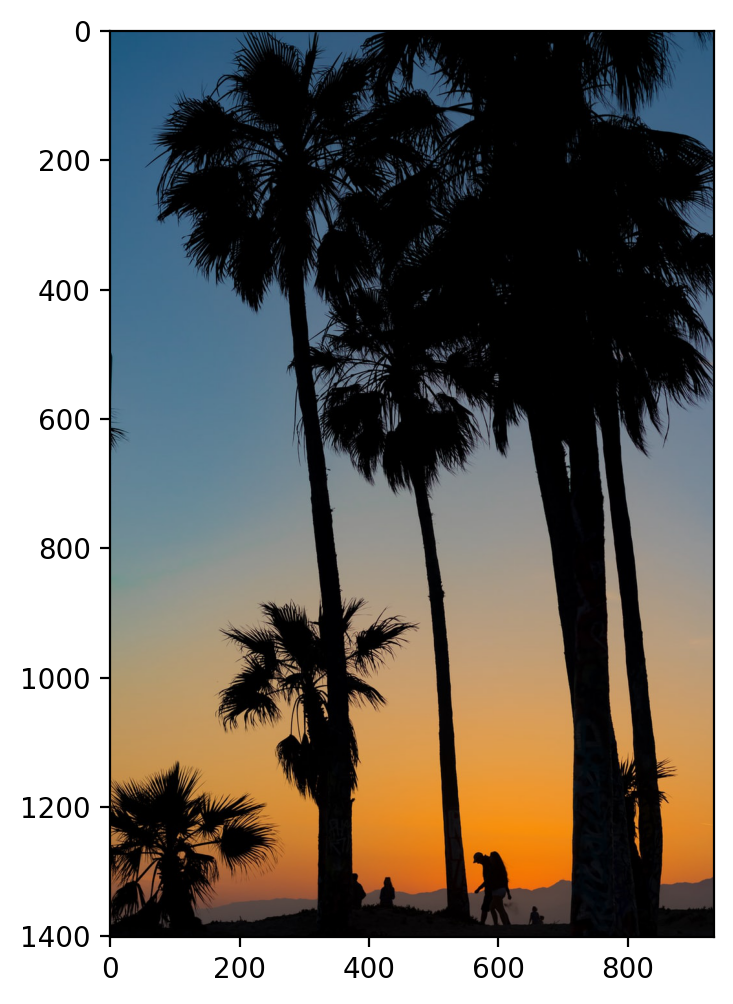

In [4]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

In [5]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

In [ ]:
#Convert from 3d to 2d
#Kmeans is designed to train on 2D data (data rows and feature columns), 
#so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [6]:
(h,w,c) = image_as_array.shape

In [7]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [8]:
from sklearn.cluster import KMeans

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
model = KMeans(n_clusters=6)

In [10]:
model

KMeans(n_clusters=6)

In [11]:
labels = model.fit_predict(image_as_array2d)

In [12]:
labels

array([3, 3, 3, ..., 1, 1, 1])

In [13]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[192.05156304, 154.47788398, 108.8529447 ],
       [  2.78879325,   2.61302759,   3.74472675],
       [136.90089267, 143.79226031, 143.9098728 ],
       [ 70.98730973, 109.2003233 , 137.67169253],
       [219.41186447, 135.18066599,  46.22192538],
       [ 68.05597424,  61.99062917,  62.21733736]])

In [14]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [15]:
rgb_codes

array([[192, 154, 109],
       [  3,   3,   4],
       [137, 144, 144],
       [ 71, 109, 138],
       [219, 135,  46],
       [ 68,  62,  62]])

In [16]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [17]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 68,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 68,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

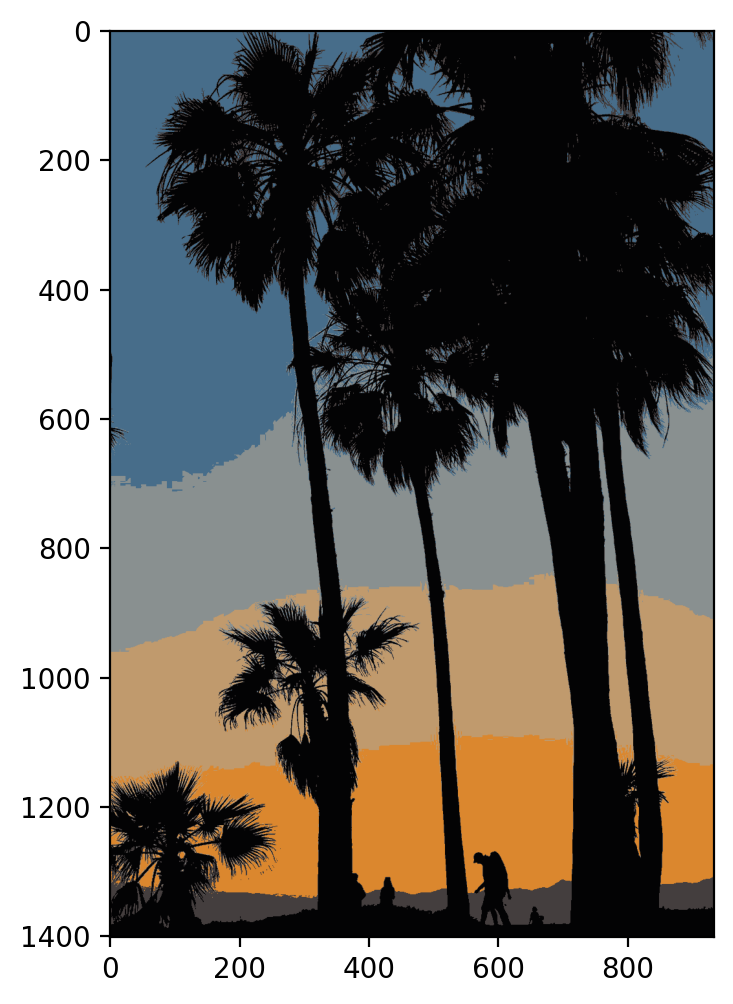

In [18]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)